# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [109]:
import pandas as pd
import numpy as np
from scipy import stats as stat
import matplotlib.pyplot as plt
df = pd.read_csv('data/human_body_temperature.csv')
df

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


In [45]:
# Your work here.
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y


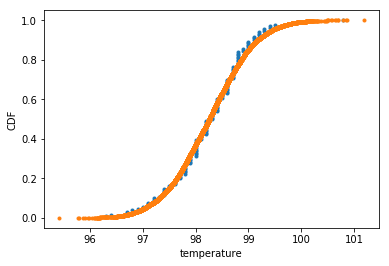

In [36]:
#Q1
x_temp,y_temp=ecdf(df.temperature)
mean=np.mean(df.temperature)
sd=np.std(df.temperature)
samples=np.random.normal(mean,sd,10000)
x_norm, y_norm=ecdf(samples)
_=plt.plot(x_temp,y_temp, marker='.', linestyle='none')
_=plt.plot(x_norm,y_norm, marker='.', linestyle='none')
_=plt.xlabel('temperature')
_=plt.ylabel('CDF')
plt.show()


Q1

based on the above graph, temperature data appears to be normally distributed. the orange data represents a normal distribution and the blue represents our temperature data

Q2

The sample size is large, as we have 129 measurements. Useally having over 30 is enough to use sampling techniques. We also have no reason to beleive the samples are also independent, as one measurement of temperature won't influence the temperature of the next subject.

In [14]:
def draw_bs_reps(data, func, size=1):

    bs_replicates = np.empty(size)

    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))

    return bs_replicates


In [38]:
adjusted_temp=df.temperature-np.mean(df.temperature)+98.6
bs_replicates=draw_bs_reps(adjusted_temp,np.mean,10000)
p_value = np.sum(bs_replicates <= mean )/len(bs_replicates)
p_value

0.0

Q3 part a

According to the bootstrap hypothesis test, its unlikely the true mean of our data is 98.6 because our p value is well less that .01

In [54]:
z_score=(mean-98.6)/(sd/np.sqrt(130))
p_value_z=stat.norm.cdf(z_score)*2
p_value_z

4.3523151658713056e-08

In [57]:
t_score,p_val_t=stat.ttest_1samp(df.temperature,98.6)
p_val_t

2.4106320415561276e-07

Q3 parts b-d

In this case we should use the 1 sample z test because we are only provided one dsataset and because our sample size is greater than 30; for high values of n the t distribution converges to the normal distribution so the z test is appropriate. the test gives us a very small p-value, so we reject the null hypothesis. when we redo the analysis with the t-test, we get a larger value for p because the t-test requires more extreme data to get low p-values compared to the z-test. however, both tests suggest that the true mean of the population is different from 98.6

In [80]:
sample=df.temperature.sample(n=10)
sample_mean=sample.mean()
sample_sd=np.std(sample)
z_score=(sample_mean-98.6)/(sample_sd/np.sqrt(10))
p_value_z=stat.norm.cdf(z_score)*2
print(z_score)
print(p_value_z)

-2.4862636323034972
0.012909229381965034


In [86]:
t_score,p_val_t=stat.ttest_1samp(sample,98.6)
print(t_score)
print(p_val_t)

-2.358676782516732
0.04269383329287947


Q4 

When we repeat the test with a sample size of 10, we should use the t -test, as the z-test requires a sample size greater than 30 to be valid. we notice that both tests have substantially larger p-values this time around. This is because the parent data has a mean close to 98.2, which itself is very close to 98.6. to spot this subtle difference in mean would require larger sample sizes, as we saw in question 3. The p value for the t-test is once again larger than the p value for the z-test, since the t-test requires more extreme data to generate small p-values. however, in both cases the tests conclude that the data is exrreme enough for us to reject the null hypothesis

Q5

for this question, we wll be using a 95% confidence level to determine what should be considered an abnormal temperature. we will use both bootstrap statistics and frequentist statistics

In [87]:
freq_conf_interval=stat.norm.interval(.95,loc=mean,scale=sd)
freq_conf_interval

(96.81775582674821, 99.68070571171329)

In [91]:
def percent_CI_95(data):
    percentiles=np.percentile(data,[2.5])
    return percentiles

In [100]:
percentile_2_5 = np.empty(10000)
percentile_97_5=np.empty(10000)
for i in range(10000):
    bootstrap_sample=np.random.choice(df.temperature, size=len(df.temperature))
    percentile_2_5[i] = np.percentile(bootstrap_sample,[2.5])
    percentile_97_5[i]= np.percentile(bootstrap_sample,[97.5])

print(np.mean(percentile_2_5))
print(np.mean(percentile_97_5))

96.76589525000001
99.57561175000001


Q5 (continued)

Based on our bootstrap and frequentist confidence intervals, a temperature below 96.76 or above 99.68 could be considered abnormal (I used the more extreme values from both measurements)

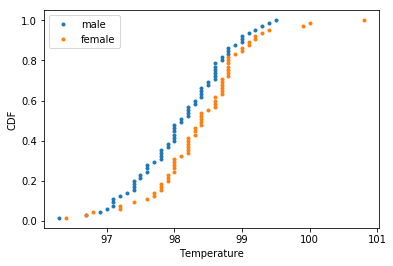

In [126]:
female_temp=df[df.gender=='F'].temperature
male_temp=df[df.gender=='M'].temperature
male_x,male_y=ecdf(male_temp)
fem_x, fem_y=ecdf(female_temp)
_=plt.plot(male_x,male_y,marker='.',linestyle='none')
_=plt.plot(fem_x,fem_y,marker='.',linestyle='none')
_=plt.xlabel('Temperature')
_=plt.ylabel('CDF')
_=plt.legend(['male','female'])
plt.show()

In [123]:
stat.ttest_ind(male_temp,female_temp)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)

6

when we look at the cdf's of the male and female temperatures, it appears that women are genrally warmer than men. we perform a two sample t test to verify this. the test uses a null hypothesis that men and women have identical temperatures. Our test returned a p-value of .0239, which leads us to reject the null hypothesis at the .05 significance level

Conclusion

Based on our data, it appears that the true mean body temperature of human beings is not 98.6. It appears to be closer to 98.25, and it seems in general women are warmer than men.